# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### From sklearn - Preprocesing 

from sklearn import preprocessing

# Dimension reduction 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Clustering 
from sklearn.manifold import TSNE

# K-fold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# From sklearn - Model creation

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import multilabel_confusion_matrix

from sklearn import metrics 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

-----
# Reading files and merging features with labels

In [2]:
#dataset = pd.read_csv("Genes\data.csv")
dataset = pd.read_csv('/Users/pedrorodriguezdeledesmajimenez/1_Coding/Datasets/RUG_Pattern-recognition_Assignment-2/Task 1/Genres/data.csv')

#labels = pd.read_csv("Genes\labels.csv")
dataset_labels =pd.read_csv('/Users/pedrorodriguezdeledesmajimenez/1_Coding/Datasets/RUG_Pattern-recognition_Assignment-2/Task 1/Genres/labels.csv')

In [3]:
# Merging both datasets and removing first column

dataset = pd.merge(dataset, dataset_labels, on='Unnamed: 0').drop("Unnamed: 0", axis=1)

In [4]:
print(f'Dataset consists of {dataset.shape[0]} input sample vectors, each vector has {dataset.shape[1]} '\
      f'gene features.\nAlso the availbale classes are {len(dataset["Class"].unique())}.'\
      f' The possible choises are {", ".join(val for val in dataset.Class.unique())}.')
class_counts = dataset.Class.value_counts()
print(f'As we can see, we have class imbalance.\n\n{class_counts.to_string()}')

Dataset consists of 801 input sample vectors, each vector has 20532 gene features.
Also the availbale classes are 5. The possible choises are PRAD, LUAD, BRCA, KIRC, COAD.
As we can see, we have class imbalance.

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78


----
# Analizing data

###  Encode the labels of the dataset

In [5]:
# Encode the labels and updaate values

le = preprocessing.LabelEncoder()

dataset["Class"] = le.fit_transform(dataset_labels.drop("Unnamed: 0", axis=1).values.ravel())

In [6]:
# Let´s store all the labels

keys = le.classes_

# And now store labels with their encoded value 

values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
dictionary

{'BRCA': 0, 'COAD': 1, 'KIRC': 2, 'LUAD': 3, 'PRAD': 4}

### Normalize the dataset



In [7]:
# Lets store the dataset values without the columns titles
x = dataset.iloc[:, :-1].values 

In [8]:
# Let´s create an instance with the normalice function
min_max_scaler = preprocessing.MinMaxScaler()

# Let´s fit the normilice function
x_scaled = min_max_scaler.fit_transform(x)

# Let´s put in the dataframe the values scaled
dataset.iloc[:, :-1] = pd.DataFrame(x_scaled)

In [9]:
dictionary

{'BRCA': 0, 'COAD': 1, 'KIRC': 2, 'LUAD': 3, 'PRAD': 4}

Number of examples of each label:

In [10]:
dataset.Class.value_counts()

0    300
2    146
3    141
4    136
1     78
Name: Class, dtype: int64

-----------
## Dimensionality reduction:  1.Principal Component Analysis

In [11]:
# Create PCA object to keep 95% of variance

pca = PCA(0.75)

# Apply PCA in input vector
pca.fit(dataset.iloc[:,:-1]) 

# Save results in an np.array
reduced = pca.transform(dataset.iloc[:,:-1])

# Save labels in an np.array
x = dataset['Class'].to_numpy()

In [12]:
# Create final dataframe with reduced dimensions
dataset_reduced_PCA = pd.DataFrame(np.column_stack((reduced, x)))

Number of features in the original dataset: 20532 <br>
After applying PCA to the dataset, we end up with:

In [13]:
dataset_reduced_PCA.shape[1]

103

In [14]:
# We are going to rename the columns name with the PCA components name

for count, column_name in enumerate(dataset_reduced_PCA.columns):
    
    if count < len(dataset_reduced_PCA.columns)-1:
        
        dataset_reduced_PCA.rename(columns={column_name : f"PCA{count+1}"}, inplace=True)
    else:
        dataset_reduced_PCA.rename(columns={column_name : "Label"}, inplace=True)

The dataset after applying the PCA analysis has the following form:

In [15]:
dataset_reduced_PCA.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA94,PCA95,PCA96,PCA97,PCA98,PCA99,PCA100,PCA101,PCA102,Label
0,-5.668141,-8.872139,15.853290,-6.659908,3.244882,3.529868,-0.186630,-4.599118,-0.780447,1.000318,...,-0.091763,0.377116,-0.012125,-1.028643,-0.541357,0.640421,-0.258044,0.735037,-0.348108,4.0
1,-1.470204,10.280182,-1.246634,-1.597277,-5.053639,5.329966,-3.213423,0.646405,-0.092015,-5.155488,...,0.272916,-0.660396,0.238561,-0.612262,-0.117655,0.256274,-1.781133,-0.576626,-0.847453,3.0
2,-10.845387,-1.345352,4.000770,8.010467,3.520304,6.439937,-2.008366,7.852581,-0.221889,-4.103816,...,-0.789400,-2.298390,0.443170,-0.151047,0.803538,0.055863,0.574898,0.244420,0.034691,4.0
3,-9.167961,-8.670123,5.481483,5.505311,-0.453232,4.098163,-2.687572,2.294694,-0.065617,-2.497998,...,0.040757,1.105573,-0.350252,0.418292,-1.065557,-0.098885,-0.457159,0.283911,0.846548,4.0
4,-6.271848,-3.101208,-7.338976,0.433540,4.290824,-0.316748,-0.306964,-1.433246,-3.194915,4.058295,...,-0.966648,-0.663006,-0.299178,1.052884,1.381582,0.461015,0.655713,-0.593092,-0.139704,0.0


#### Lets display the explained variance of each PCA component

In [16]:
pca.explained_variance_ratio_.shape

(102,)

In [17]:
# To see the percentage of variation thaat each principal components accounts for

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var.shape

(102,)

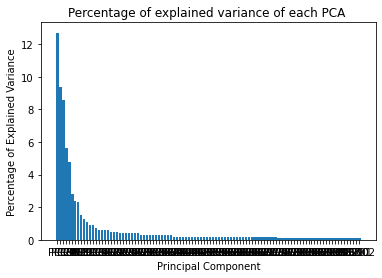

In [18]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Percentage of explained variance of each PCA ')
plt.show()

In [19]:
# Here we calculate the cumulative sum of the variance so we can plot and see how the variance of the PCA evolute 

cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)
cum_sum_eigenvalues.shape

(102,)

In [20]:
# Let´s see the cummulative variance
cum_sum_eigenvalues[101]

0.7508083419601685

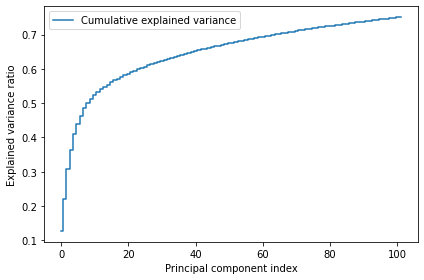

In [21]:
# Plot with regards of components

#plt.bar(range(0,len(exp_var_pca[:150])), exp_var_pca[:150], alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [22]:
#Final dataset after feature extraction and further process

final_df = dataset_reduced_PCA

After further elimination of features we end up with the final form of the data.

In [23]:
final_df.shape

(801, 103)

Finally, we have 102 PCA to represent the dataset.

Final dataset after preprocesing: final_df

In [24]:
final_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA94,PCA95,PCA96,PCA97,PCA98,PCA99,PCA100,PCA101,PCA102,Label
0,-5.668141,-8.872139,15.853290,-6.659908,3.244882,3.529868,-0.186630,-4.599118,-0.780447,1.000318,...,-0.091763,0.377116,-0.012125,-1.028643,-0.541357,0.640421,-0.258044,0.735037,-0.348108,4.0
1,-1.470204,10.280182,-1.246634,-1.597277,-5.053639,5.329966,-3.213423,0.646405,-0.092015,-5.155488,...,0.272916,-0.660396,0.238561,-0.612262,-0.117655,0.256274,-1.781133,-0.576626,-0.847453,3.0
2,-10.845387,-1.345352,4.000770,8.010467,3.520304,6.439937,-2.008366,7.852581,-0.221889,-4.103816,...,-0.789400,-2.298390,0.443170,-0.151047,0.803538,0.055863,0.574898,0.244420,0.034691,4.0
3,-9.167961,-8.670123,5.481483,5.505311,-0.453232,4.098163,-2.687572,2.294694,-0.065617,-2.497998,...,0.040757,1.105573,-0.350252,0.418292,-1.065557,-0.098885,-0.457159,0.283911,0.846548,4.0
4,-6.271848,-3.101208,-7.338976,0.433540,4.290824,-0.316748,-0.306964,-1.433246,-3.194915,4.058295,...,-0.966648,-0.663006,-0.299178,1.052884,1.381582,0.461015,0.655713,-0.593092,-0.139704,0.0


### Output of preprocesing 

In [25]:
dataset_reduced_PCA.shape

(801, 103)

--------------
# Model Implementation:  Esemble methods 

###  80% Training data, 20% test data

#For ORIGINAL data as input

input_data = dataset.iloc[:,:-1].values
label_data = dataset.iloc[:,-1].values

In [55]:
#For REDUCED data as input

input_data = dataset_reduced_PCA.iloc[:,:-1].values
label_data = dataset_reduced_PCA.iloc[:,-1].values

In [56]:
# We split the data  
X_train, X_test, y_train, y_test = train_test_split(input_data,label_data, test_size=0.2)

In [57]:
from sklearn.pipeline import Pipeline

# Pipeline 1: inside we are giving a list of tuples 
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression())])

# Pipeline 2
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier())])

# Pipeline 3
pipeline_randomforest = Pipeline([('rf_classifier', RandomForestClassifier())])

In [58]:
## Lets make a list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

In [59]:
# Variable declaration

best_accuracy = 0.0
best_classifier = 0 
best_pipeline = ""

In [60]:
# Dictionary of pipelines and classifier types for ease of reference

pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

In [61]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    

In [62]:
# Display

for i, model in enumerate(pipelines):
    print("{} Test accuracy: {}".format(pipe_dict[i], model.score(X_test,y_test)))

Logistic Regression Test accuracy: 1.0
Decision Tree Test accuracy: 0.9440993788819876
RandomForest Test accuracy: 0.968944099378882


In [72]:
for i, model in enumerate(pipelines):
    if model.score(X_test, y_test) > best_accuracy:
        best_accuracy = model.score(X_test, y_test)
        best_pipeline = model
        best_classifier = i
        
print('Classifier with the best accuracy: {}' .format(pipe_dict[best_classifier]))   

Classifier with the best accuracy: Logistic Regression


In [84]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

labels = ['Logistic Regression', 'Decision Tree', 'Random Forest']

In [92]:
from sklearn.ensemble import VotingClassifier

evc = VotingClassifier(estimators = [(labels[0],lr),('labels[1], dt), (labels[2], rf)], voting = 'hard')

evc.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier()),
                             ('RF', RandomForestClassifier())])

In [93]:
evc.score(X_test, y_test)

0.9813664596273292

In [105]:
cross_val_score(evc,input_data,label_data, cv=5).mean()

0.9912655279503106